In [38]:
import torch
import pandas as pd
import numpy as np
data = pd.read_csv('CSR.csv')

list_data = np.array(data.values.tolist())
np.random.shuffle(list_data)

list_data2 = list_data
for i in range(len(list_data2)):
    if list_data2[i][-2] == 1 :
        list_data2[i][-1] = 6


In [39]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, input, labels, FN):
        self.input = input
        self.labels = labels
        self.FN = FN
        
    def __len__(self):
        return len(self.input)
    
    def __getitem__(self, index):
        data_sample = self.input[index]
        label = self.labels[index]
        cost = self.FN[index]
        return data_sample, label, cost

dataset = CustomDataset(torch.tensor(list_data[:, :-2], dtype=torch.float32), torch.tensor(list_data[:, -2], dtype=torch.float32).view(-1, 1), torch.tensor(list_data[:, -1], dtype=torch.float32))

data_loader_1 = DataLoader(dataset, batch_size=32, shuffle= shuffle, num_workers=10)


/home/sym/miniconda/envs/env_1/lib/python3.10/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.Sigmoid(),
            nn.Linear(32, 1),
            
        )
    def forward(self, x):
        out = torch.sigmoid(self.layers(x))
        return out

# Define custom loss function
class CustomLoss_1(nn.Module):
    def __init__(self):
        super(CustomLoss_1, self).__init__()

    def forward(self, y_pred, y_true, FN):
        loss = torch.mean(y_true*y_pred * (6) + (1-y_pred)*(FN) + (1 - y_pred)*(y_pred)*(6))
        return loss

class CustomLoss_2(nn.Module):
    def __init__(self):
        super(CustomLoss_2, self).__init__()
    def forward(self, y_pred, y_true, FN):
        #gamma_value =  self.g
        loss = torch.mean(y_true* - torch.log(y_pred) * 6 + (- torch.log(1-y_pred)*FN) + (- torch.log(1 - y_pred)*(y_pred)*6 ))
        return loss
        return loss   
        
def calculate_accuracy(outputs, labels):
    # Convert outputs to predictions (0 or 1)
    predictions = (outputs >= 0.5).float()
    # Compare predictions with labels and calculate accuracy
    accuracy = (predictions == labels).float().mean().item()
    return accuracy

In [41]:
device = 'cuda'
input_size = list_data.shape[1] - 2
model = LogisticRegression(input_size).to(device)  
optimizer = optim.SGD(model.parameters(), lr=0.1)  


In [42]:
criterion = CustomLoss_1()
accuracy1 = []
loss1 = []
num_epochs = 20
for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    running_accuracy = 0.0
    for inputs, labels, FN in data_loader_1:
        inp = inputs.to(device)
        y = labels.to(device)
        F = FN.to(device)
        optimizer.zero_grad()  
        outputs = model(inp) 
        loss = criterion(outputs, y, F)  
        loss.backward()  
        optimizer.step()  
        running_loss += loss.item() * inputs.size(0)

        accuracy = calculate_accuracy(outputs, y)
        running_accuracy += accuracy * inputs.size(0)
    
   
    epoch_loss = running_loss / len(data_loader_1.dataset)
    epoch_accuracy = running_accuracy / len(data_loader_1.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    accuracy1.append(epoch_accuracy)
    loss1.append(epoch_loss)


 


Epoch [1/20], Loss: 1.7997, Accuracy: 0.2986
Epoch [2/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [3/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [4/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [5/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [6/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [7/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [8/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [9/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [10/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [11/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [12/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [13/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [14/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [15/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [16/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [17/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [18/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [19/20], Loss: 1.7915, Accuracy: 0.2986
Epoch [20/20], Loss: 1.7915, Accuracy: 0.2986


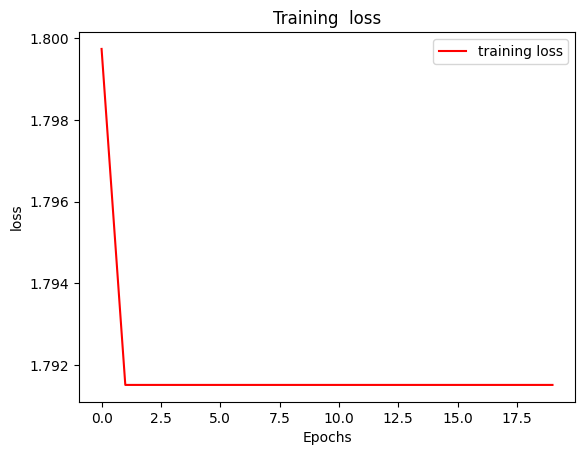

In [47]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array([i for i in range(20)]) 
y = np.array(loss1)

plt.plot(x, y, color='r', label='training loss') 

plt.xlabel("Epochs") 
plt.ylabel("loss") 
plt.title("Training  loss") 
plt.legend() 
plt.savefig('los_plot1.png')
plt.show() 

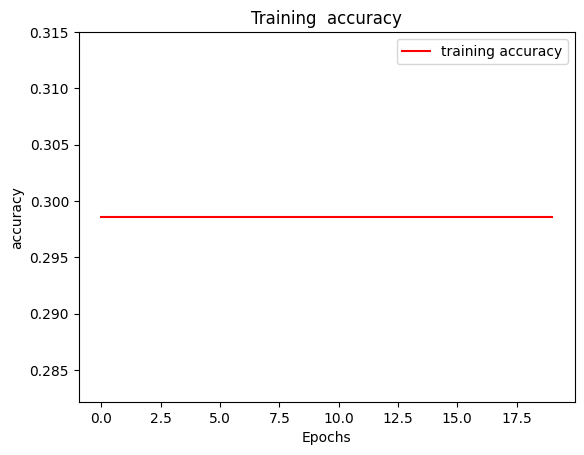

In [50]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array([i for i in range(20)]) 
y = np.array(accuracy1)
plt.plot(x, y, color='r', label='training accuracy') 

plt.xlabel("Epochs") 
plt.ylabel("accuracy") 
plt.title("Training  accuracy") 
plt.legend() 
plt.savefig('acc_plot1.png')
plt.show() 

In [46]:
accuracy2 = []
loss2 = []
criterion = CustomLoss_2()
num_epochs = 20
for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    running_accuracy = 0.0
    for inputs, labels, FN in data_loader_1:
        inp = inputs.to(device)
        y = labels.to(device)
        F = FN.to(device)
        optimizer.zero_grad()  
        outputs = model(inp) 
        loss = criterion(outputs, y, F)  
        loss.backward()  
        optimizer.step()  
        running_loss += loss.item() * inputs.size(0)

        accuracy = calculate_accuracy(outputs, y)
        running_accuracy += accuracy * inputs.size(0)
    
   
    epoch_loss = running_loss / len(data_loader_1.dataset)
    epoch_accuracy = running_accuracy / len(data_loader_1.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    accuracy2.append(epoch_accuracy)
    loss2.append(epoch_loss)


/home/sym/miniconda/envs/env_1/lib/python3.10/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [1/20], Loss: nan, Accuracy: 0.7013
Epoch [2/20], Loss: nan, Accuracy: 0.7014
Epoch [3/20], Loss: nan, Accuracy: 0.7014
Epoch [4/20], Loss: nan, Accuracy: 0.7014
Epoch [5/20], Loss: nan, Accuracy: 0.7014
Epoch [6/20], Loss: nan, Accuracy: 0.7014
Epoch [7/20], Loss: nan, Accuracy: 0.7014
Epoch [8/20], Loss: nan, Accuracy: 0.7014
Epoch [9/20], Loss: nan, Accuracy: 0.7014
Epoch [10/20], Loss: nan, Accuracy: 0.7014
Epoch [11/20], Loss: nan, Accuracy: 0.7014
Epoch [12/20], Loss: nan, Accuracy: 0.7014
Epoch [13/20], Loss: nan, Accuracy: 0.7014
Epoch [14/20], Loss: nan, Accuracy: 0.7014
Epoch [15/20], Loss: nan, Accuracy: 0.7014
Epoch [16/20], Loss: nan, Accuracy: 0.7014
Epoch [17/20], Loss: nan, Accuracy: 0.7014
Epoch [18/20], Loss: nan, Accuracy: 0.7014
Epoch [19/20], Loss: nan, Accuracy: 0.7014
Epoch [20/20], Loss: nan, Accuracy: 0.7014


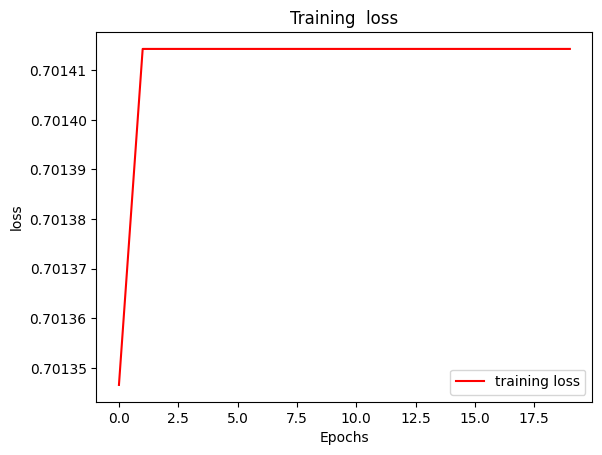

In [48]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array([i for i in range(20)]) 
y = np.array(accuracy2)

plt.plot(x, y, color='r', label='training loss') 

plt.xlabel("Epochs") 
plt.ylabel("loss") 
plt.title("Training  loss") 
plt.legend() 
plt.savefig('los_plot2.png')
plt.show() 

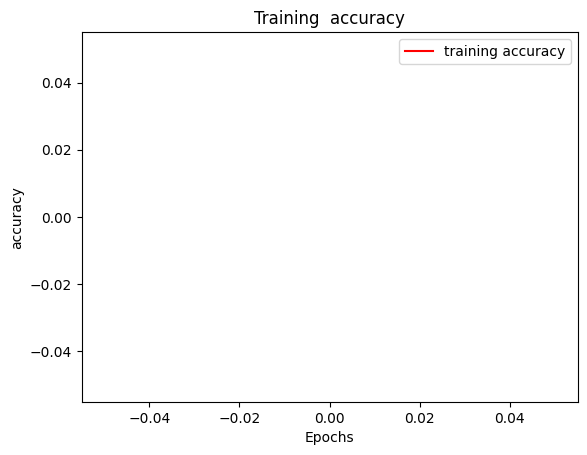

In [49]:
import matplotlib.pyplot as plt 
import numpy as np 

x = np.array([i for i in range(20)]) 
y = np.array(loss2)
plt.plot(x, y, color='r', label='training accuracy') 

plt.xlabel("Epochs") 
plt.ylabel("accuracy") 
plt.title("Training  accuracy") 
plt.legend() 
plt.savefig('acc_plot2.png')
plt.show() 